In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from netCDF4 import Dataset

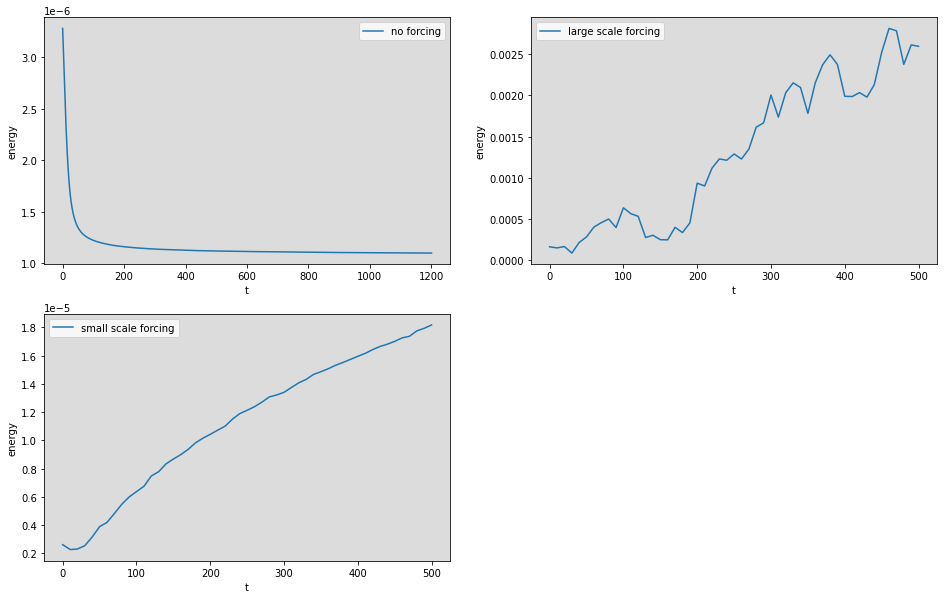

In [9]:
#########
ncfile = '/home/gula/data/fluid2d/fd_00/fd_00_diag.nc'

nc = Dataset(ncfile,'r')
ke_nof=nc.variables['ke'][:]
t_nof=nc.variables['t'][:]
nc.close()

fig=plt.figure(figsize=(16.,10.))
ax1 = fig.add_subplot(221,facecolor='Gainsboro')     
plt.plot(t_nof,ke_nof)
plt.xlabel('t')
plt.ylabel('energy')
plt.legend(['no forcing'])

#########


ncfile = '/home/gula/data/fluid2d/turb2d_forced_ls/turb2d_forced_ls_diag.nc'


nc = Dataset(ncfile,'r')
ke_f=nc.variables['ke'][:]
t_f=nc.variables['t'][:]
nc.close()

ax2 = fig.add_subplot(222,facecolor='Gainsboro')   
ax2.plot(t_f,ke_f)
ax2.set_xlabel('t')
ax2.set_ylabel('energy')
ax2.legend(['large scale forcing'])

#########

ncfile = '/home/gula/data/fluid2d/turb2d_forced_ss/turb2d_forced_ss_diag.nc'


nc = Dataset(ncfile,'r')
ke_f=nc.variables['ke'][:]
t_f=nc.variables['t'][:]
nc.close()

ax2 = fig.add_subplot(223,facecolor='Gainsboro')   
ax2.plot(t_f,ke_f)
ax2.set_xlabel('t')
ax2.set_ylabel('energy')
ax2.legend(['small scale forcing'])



In [41]:
# Define some FFT functions

###################################################################################

from scipy import fftpack


# for 1d spectra

def myfft(u,dx=1):
    ny,nx = u.shape[0],u.shape[1]
    k = np.fft.rfftfreq(u.shape[0],dx)[:]*1000./(2*np.pi)# in cpkm
    dk = k[1]-k[0]
    PSD = np.abs(np.fft.rfft((u[:,0])*np.hanning(ny))[:]**2)/ny/nx/dk
    
    for ix in range(1,nx):
        PSD += np.abs(np.fft.rfft((u[:,ix])*np.hanning(ny))[:]**2)/ny/nx/dk
    return k,PSD


def plot_psd1d(var,dx):

    # compute and plot PSD(u) for t=0
    f, P = myfft(var[0,:,:],dx=dx)
    plot0, = plt.loglog(f, P,linewidth=5.)

    # compute and plot PSD(u) for t>0
    for it in range(0,len(t),1):
        f, P =myfft(var[it,:,:],dx=dx)
        plt.loglog(f, P,linewidth=.5)

    plot1, = plt.loglog(f, P,'--',linewidth=5)
    plot3, = plt.loglog(f, f**(-5/3)*P[1]/f[1]**(-5/3),'--',color='k',linewidth=2)
    plot2, = plt.loglog(f, f**(-3)*P[1]/f[1]**(-3),'-',color='k',linewidth=2)

    plt.grid(b=True, which='both', color='0.65',linestyle='-',linewidth=0.2)
    #plt.axis([1e2, 1e5, 1e-25, 1e-9])
    plt.legend([plot0,plot1,plot2,plot3], ['initial','final',r'$k^{-3}$',                        
                                    r'$k^{-5/3}$'],
                                    bbox_to_anchor=(0.95, 0.95),loc=0, borderaxespad=0.)
    ax1.set_xlabel('k [cpkm]'); 
    ax1.set_ylabel('KE density [m$^2$ s$^{-2}$/cpkm]'); 

    

(121, 128, 128)


/home/gula/.virtualenvs/paragridded/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in power
/home/gula/.virtualenvs/paragridded/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in power


Text(0.5, 1.0, 'no forcing')

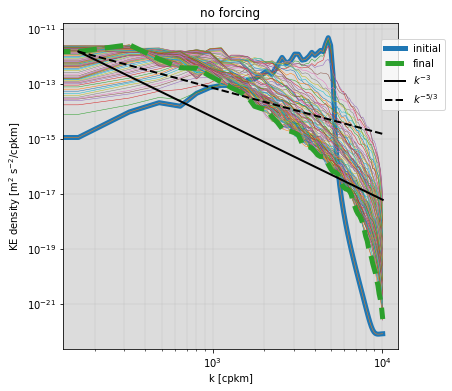

In [42]:

ncfile = '/home/gula/data/fluid2d/fd_00/fd_00_his.nc'
#ncfile = '/home/gula/data/fluid2d/twodimturb_00/twodimturb_00_his.nc'

# get Psi
nc = Dataset(ncfile,'r')
psi=nc.variables['psi'][:]
#vrt=nc.variables['vorticity'][:]
#tracer=nc.variables['tracer'][:]
t=nc.variables['t'][:]
x=nc.variables['x'][:]; dx = x[1] - x[0]
y=nc.variables['y'][:]; dy = y[1] - y[0]
nc.close()

print(psi.shape)

# compute u
#var = psi[:,:,1:]-psi[:,:,:-1]
var = psi[:,1:,:]-psi[:,:-1,:]

# plot PSD
fig=plt.figure(figsize=(6.,6.))
ax1 = fig.add_subplot(111,facecolor='Gainsboro')   
plot_psd1d(var,dy)
plt.title('no forcing')

